### Comparison of end-to-end distance distributions and scaling exponents


In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [2]:
from afrc import AnalyticalFRC

In [4]:
from afrc.polymer_models.saw import SAW
from afrc.polymer_models.wlc import WormLikeChain
from afrc.polymer_models.wlc2 import WormLikeChain2

Text(0.5, 0, 'r ($\\rm\\AA$)')

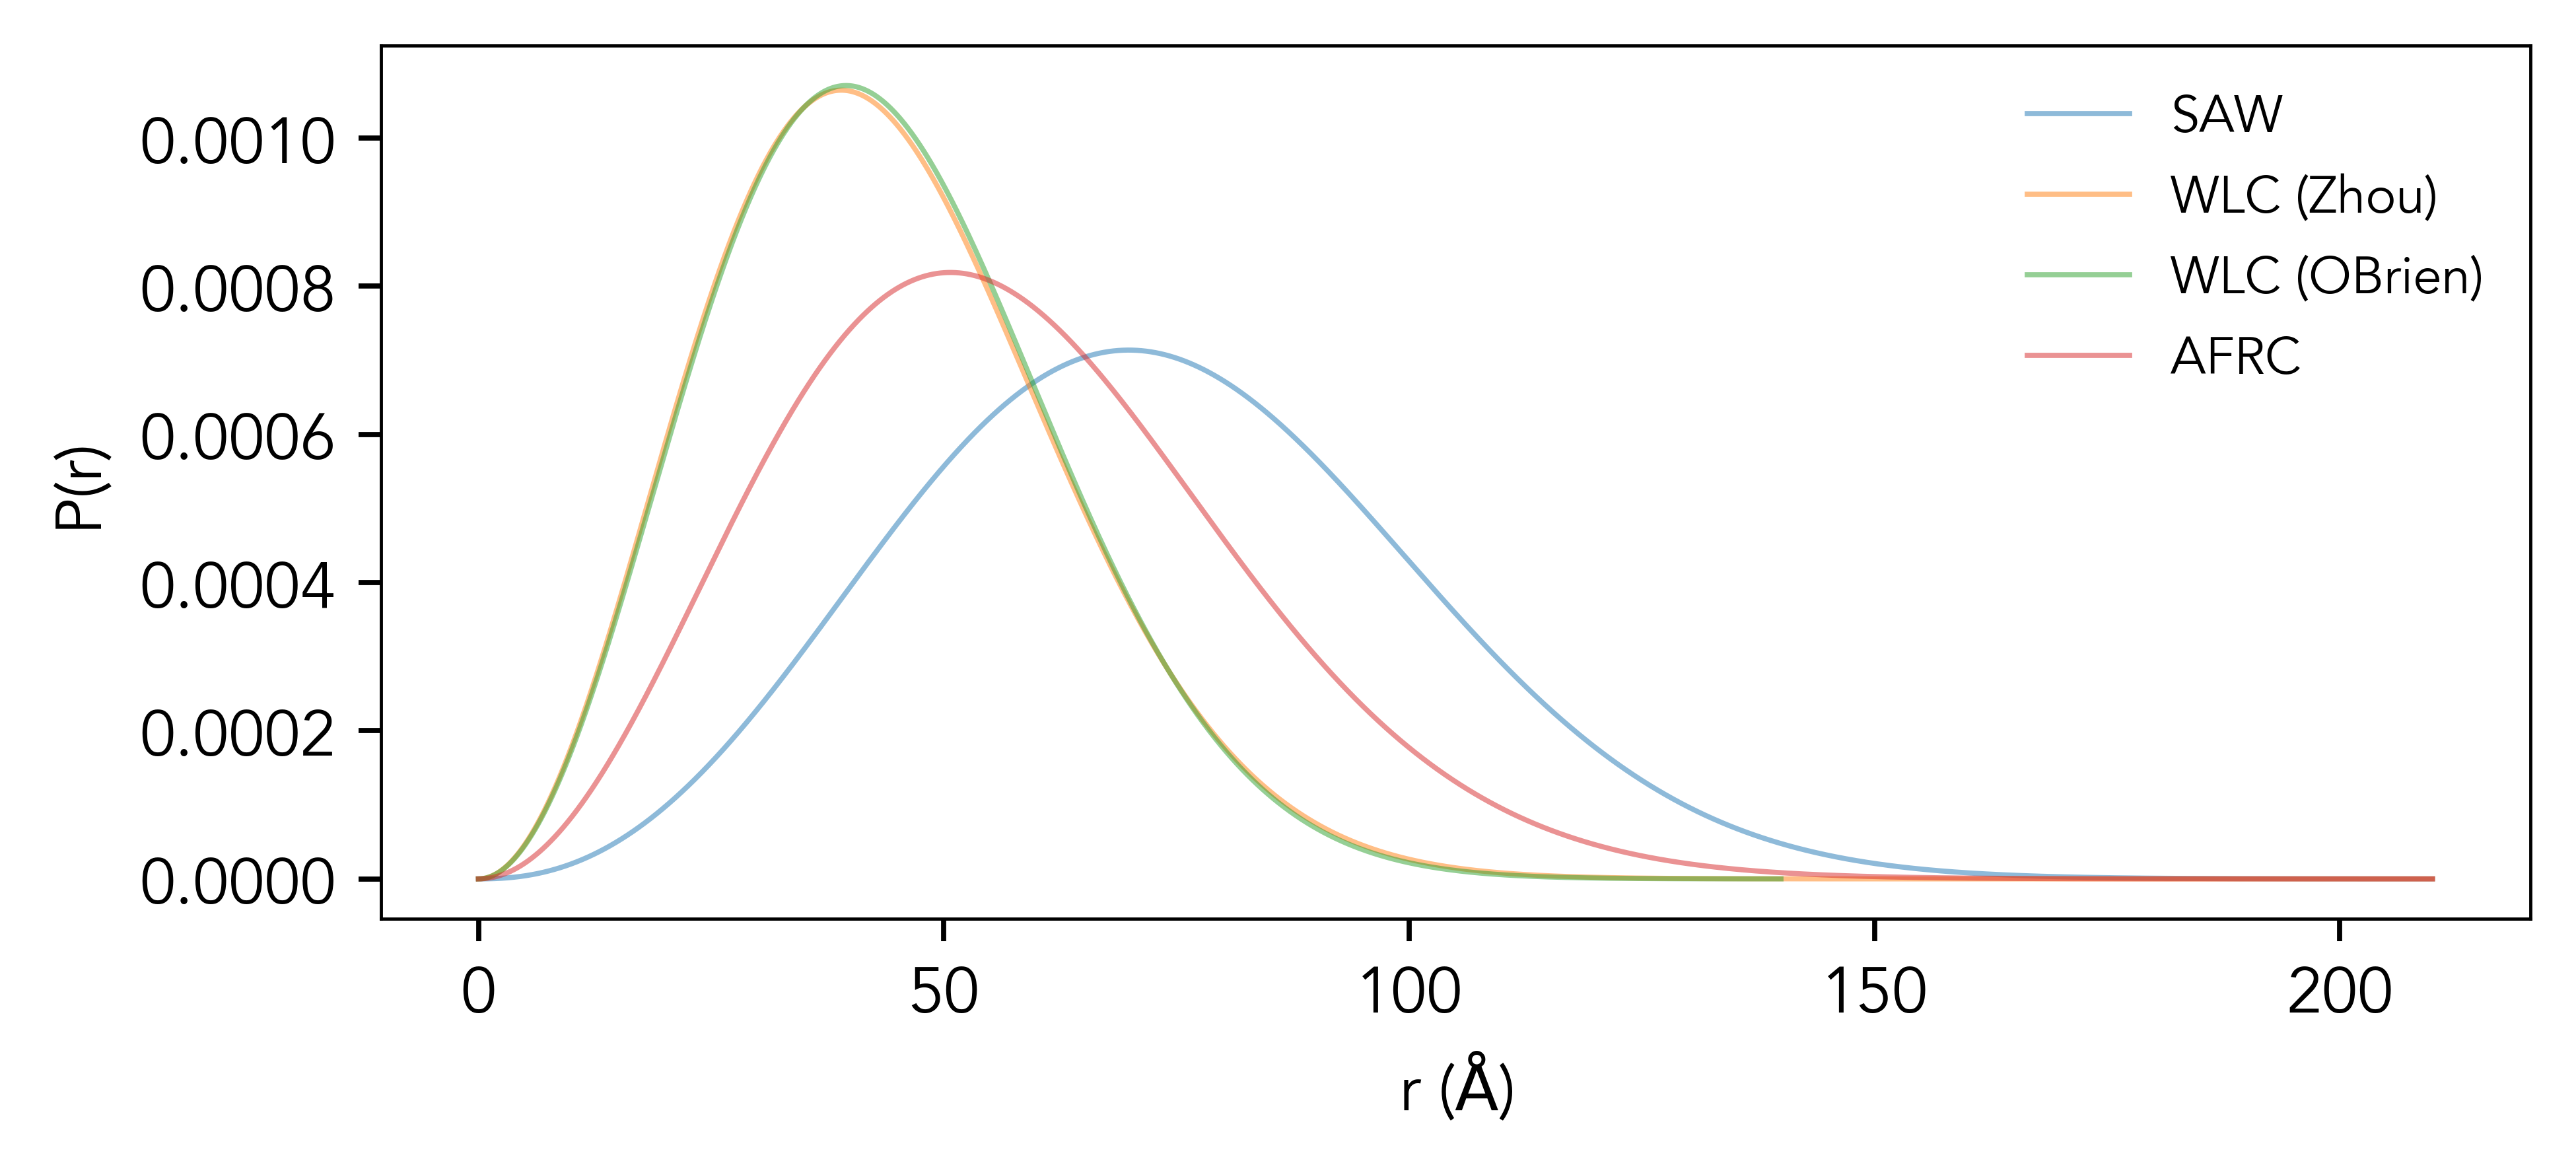

In [24]:
figure(None, (6,2.5), dpi=350)
seq = 'GS'*50

[AFRC_a, AFRC_b] = AnalyticalFRC(seq).get_re_distribution()
[SAW_a, SAW_b] = SAW(seq).get_end_to_end_distribution(prefactor=5)
[WLC1_a, WLC1_b] = WormLikeChain(seq).get_end_to_end_distribution()
[WLC2_a, WLC2_b] = WormLikeChain2(seq).get_end_to_end_distribution()



plt.plot(SAW_a, SAW_b, label='SAW', linewidth=0.8, alpha=0.5)
plt.plot(WLC1_a, WLC1_b, label='WLC (Zhou)',linewidth=0.8, alpha=0.5)
plt.plot(WLC2_a, WLC2_b, label='WLC (OBrien)',linewidth=0.8, alpha=0.5)
plt.plot(AFRC_a, AFRC_b, label='AFRC',linewidth=0.8, alpha=0.5)
plt.legend(fontsize=8,frameon=False)
plt.ylabel('P(r)')
plt.xlabel(r'r ($\rm\AA$)')

In [30]:
lengths = np.arange(10,200,10)

AFRC_e2e = [AnalyticalFRC('L'*i).get_mean_re() for i in lengths]
WLC1_e2e = [WormLikeChain('L'*i).get_mean_end_to_end_distance() for i in lengths]
WLC2_e2e = [WormLikeChain2('L'*i).get_mean_end_to_end_distance() for i in lengths]
SAW_e2e  = [SAW('L'*i).get_mean_end_to_end_distance(prefactor=5) for i in lengths] 

/Users/alex/Dropbox/WASHU/Holehouse/tools/afrc/afrc/polymer_models/wlc2.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  LHS = (PREFACT*r2) / (Lc*np.power((1-RoL2),9/2))
/Users/alex/Dropbox/WASHU/Holehouse/tools/afrc/afrc/polymer_models/wlc2.py:205: RuntimeWarning: divide by zero encountered in double_scalars
  RHS = (-3*Lc) / (4*Lp*(1-RoL2))
/Users/alex/Dropbox/WASHU/Holehouse/tools/afrc/afrc/polymer_models/wlc2.py:207: RuntimeWarning: invalid value encountered in double_scalars
  p_r = LHS*np.exp(RHS)
/Users/alex/Dropbox/WASHU/Holehouse/tools/afrc/afrc/polymer_models/wlc2.py:204: RuntimeWarning: invalid value encountered in power
  LHS = (PREFACT*r2) / (Lc*np.power((1-RoL2),9/2))
/Users/alex/Dropbox/WASHU/Holehouse/tools/afrc/afrc/polymer_models/wlc2.py:207: RuntimeWarning: overflow encountered in exp
  p_r = LHS*np.exp(RHS)


In [59]:
nu_SAW  = np.polyfit(np.log(lengths), np.log(SAW_e2e),1)[0]
nu_AFRC = np.polyfit(np.log(lengths), np.log(AFRC_e2e),1)[0]
nu_WLC1 = np.polyfit(np.log(lengths), np.log(WLC1_e2e),1)[0]
nu_WLC2 = np.polyfit(np.log(lengths), np.log(WLC2_e2e),1)[0]

print(f'Scaling exponent for SAW: {np.round(nu_SAW,3)}')
print(f'Scaling exponent for WLC1: {np.round(nu_WLC1,3)}')
print(f'Scaling exponent for WLC2: {np.round(nu_WLC2,3)}')
print(f'Scaling exponent for AFRC: {np.round(nu_AFRC,3)}')


Scaling exponent for SAW: 0.598
Scaling exponent for WLC1: 0.5
Scaling exponent for WLC2: 0.503
Scaling exponent for AFRC: 0.5


In [62]:
AFRC_rg = [AnalyticalFRC('L'*i).get_mean_rg() for i in lengths]
WLC2_rg = [WormLikeChain2('L'*i).get_mean_rg() for i in lengths]


In [63]:
AFRC_rg = [AnalyticalFRC('L'*i).get_mean_rg() for i in lengths]
WLC2_rg = [WormLikeChain2('L'*i).get_mean_rg() for i in lengths]


nu_WLC2_rg  = np.polyfit(np.log(lengths), np.log(WLC2_rg),1)[0]
nu_AFRC_rg = np.polyfit(np.log(lengths), np.log(AFRC_rg),1)[0]


print(f'Scaling exponent for Rg from WLC2: {np.round(nu_WLC2_rg,3)}')
print(f'Scaling exponent for Rg from AFRC: {np.round(nu_AFRC_rg,3)}')


Scaling exponent for Rg from WLC2: 0.469
Scaling exponent for Rg from AFRC: 0.5
